In [ ]:
# Feb 8, 2021
# Importamos las bibliotecas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
# Para calcular las estacionalidad, tendencia y residuo 
import statsmodels.api as sm
# Matplotlib mostrará los resultados en la Notebook de Jupyter
%matplotlib inline

In [2]:
# En esta celda se hacen todas las operaciones de preparar el DataFrame df_meteo
# 
# En esta nueva Jupyter Notebook, en una celda vamos a concentrar todas las operaciones
# de transformación del dataframe original df_dist

# Tomar la dirección URL del archivo en formato 'raw'
# url = 'https://raw.githubusercontent.com/carloslizarragac/FisicaComputacional1/master/Actividad1/Guaymas26292.txt'
url = 'https://raw.githubusercontent.com/Majoramu/Fisica_Computacional1/main/Actividad_1/25116.txt'

# Definimos los nombres de las columnas
# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# El separador de datos es de uno o más espacios, sep='\s+'
# Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado
# Se procesan los datos utilizando Python, engine='python' 
my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']
df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

# Hacemos una copia de trabajo y preservamos el dataframe original
df_work0 = df_dist.copy()

# Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_work1 = df_work0.replace(to_replace=str_Nulo, value='', regex=True)

# Deseamos convertir los valores de las variables ambientales a núm. flotantes 
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_work1[cols] = pd.to_numeric(df_work1[cols], errors='coerce')

# Volvemos a hacer una pausa y definimos un nuevo dataframe por si hay que regresarse.
df_work2 = df_work1.copy()

# Pandas tiene la función pd.to_datetime que convierte una cadena en tipo datetime64[ns]
# Intentamos a ver si Python reconoce el formato en nuestro caso. 
# Agregamos la opción de que el primer dato es el día (dayfirst=True)
df_work2['Fecha']=pd.to_datetime(df_work2['Fecha'], dayfirst=True).copy()

# Buscamos ahora añadir dos columnas adicionales: df['Año'], df['Mes']
# Usaremos la función .dt.year y .dt.strftime(%b) para extraer el Año 
# y Mes (Abreviado) de la Fecha
df_work2['Año'] = df_work2['Fecha'].dt.year
df_work2['Mes'] = df_work2['Fecha'].dt.strftime('%b')

# Definimos un nuevo DataFrame para el análisis de los datos meteorológicos. 
# Será nuestro nuevo punto de partida.
df_meteo = df_work2.copy()
df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19037 entries, 0 to 19036
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   19037 non-null  datetime64[ns]
 1   Precip  19037 non-null  float64       
 2   Evap    16923 non-null  float64       
 3   Tmax    19030 non-null  float64       
 4   Tmin    19004 non-null  float64       
 5   Año     19037 non-null  int64         
 6   Mes     19037 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.0+ MB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1961-01-01     0.0   0.8  22.5   8.0  1961  Jan
1 1961-01-02     0.0   1.8  26.5   8.5  1961  Jan
2 1961-01-03     0.0   2.0  25.5   7.5  1961  Jan
3 1961-01-04     0.0   2.5  24.5  10.5  1961  Jan
4 1961-01-05     0.0   1.5  20.5  12.5  1961  Jan
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
19032 2013-05-27     0.0   NaN  37.0  20.5  2013  May
19033 2

Creamos una **Serie de Tiempo**, fijando la variable 'Fecha' como un nuevo índice del DataFrame.

In [3]:
# Hacemos una copia del último DataFrame para realizar nuevas operaciones
df_meteo_ts = df_meteo.copy()
# Redefinimos el índice del DataFrame a que sea la variable 'Fecha'
df_meteo_ts = df_meteo_ts.set_index('Fecha')

# Verificamos
df_meteo_ts.info()
print(df_meteo_ts.head())
print(df_meteo_ts.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19037 entries, 1961-01-01 to 2013-05-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Precip  19037 non-null  float64
 1   Evap    16923 non-null  float64
 2   Tmax    19030 non-null  float64
 3   Tmin    19004 non-null  float64
 4   Año     19037 non-null  int64  
 5   Mes     19037 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 1.0+ MB
            Precip  Evap  Tmax  Tmin   Año  Mes
Fecha                                          
1961-01-01     0.0   0.8  22.5   8.0  1961  Jan
1961-01-02     0.0   1.8  26.5   8.5  1961  Jan
1961-01-03     0.0   2.0  25.5   7.5  1961  Jan
1961-01-04     0.0   2.5  24.5  10.5  1961  Jan
1961-01-05     0.0   1.5  20.5  12.5  1961  Jan
            Precip  Evap  Tmax  Tmin   Año  Mes
Fecha                                          
2013-05-27     0.0   NaN  37.0  20.5  2013  May
2013-05-28     0.0   NaN  35.5  20.0 

**Actividad 5.1:** Explora tus datos de Precipitación los últimos años 1990 - fin de datos. \
- Grafica todo el rango de datos utilizando la función df.plot()
- Analiza un año específico completo.
- Grafica la estacionalidad de tus datos por mes utilizando la función sns.boxplot()

In [4]:

# Seleccionaremos un conjunto de años de 30 años  
df_30 = df_meteo_ts[(df_meteo_ts['Año'] >= 1930) & (df_meteo_ts['Año'] < 1960)]
df_60 = df_meteo_ts[(df_meteo_ts['Año'] >= 1960) & (df_meteo_ts['Año'] < 1990)]
df_90 = df_meteo_ts[(df_meteo_ts['Año'] >= 1990) & (df_meteo_ts['Año'] < 2014)]

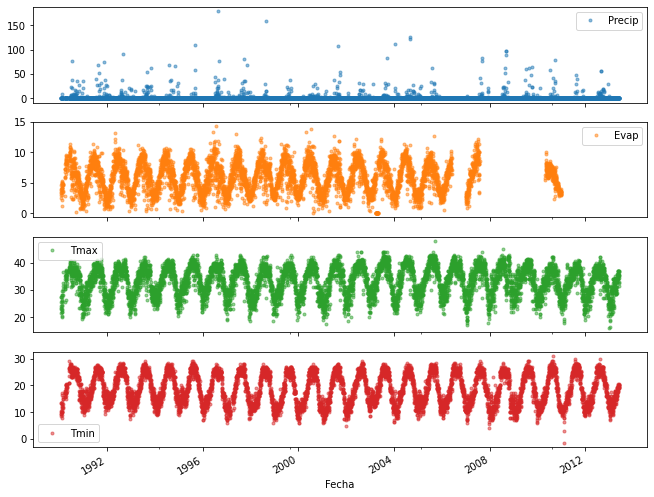

In [5]:
# Podemos visualizar la colección de los últimos 30 años y ver si hay datos faltantes.
cols_plot = ['Precip', 'Evap', 'Tmax', 'Tmin']
ax_ylabels = ['Precip (mm)', 'Evap (mm)', 'Tmax ºC', 'Tmin (ºC)']
axes = df_90[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', 
                                  figsize=(11, 9), subplots=True)

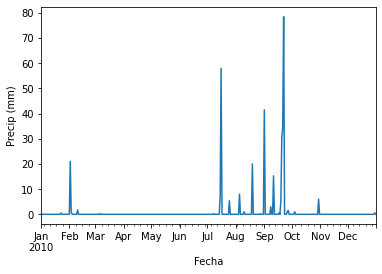

In [6]:
# Investigando un año de datos
ax = df_90.loc['2010', 'Precip'].plot()
ax.set_ylabel('Precip (mm)');

Variación en Precipitación promedio 60-30 : nan
Variación en Precipitación promedio 90-30 : nan
Variación en Precipitación promedio 90-60 : 0.09401932445806738


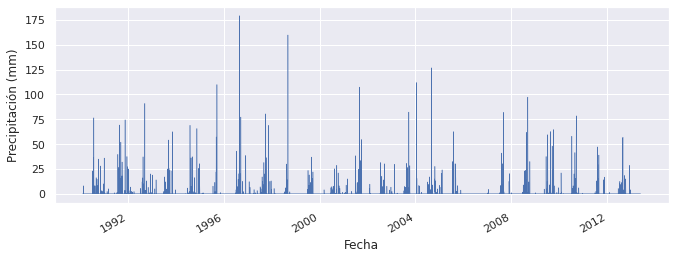

In [7]:
# Graficamos la Precipitación de los últimos 30 años (1990-hasta 2013)
sns.set(rc={'figure.figsize':(11, 4)})
Precip_ave_90 = df_90.Precip.mean()
Precip_ave_60 = df_60.Precip.mean()
Precip_ave_30 = df_30.Precip.mean()
df_90['Precip'].plot(linewidth=0.5);
plt.ylabel('Precipitación (mm)');

print('Variación en Precipitación promedio 60-30 :', Precip_ave_60-Precip_ave_30)
print('Variación en Precipitación promedio 90-30 :', Precip_ave_90-Precip_ave_30)
print('Variación en Precipitación promedio 90-60 :', Precip_ave_90-Precip_ave_60)

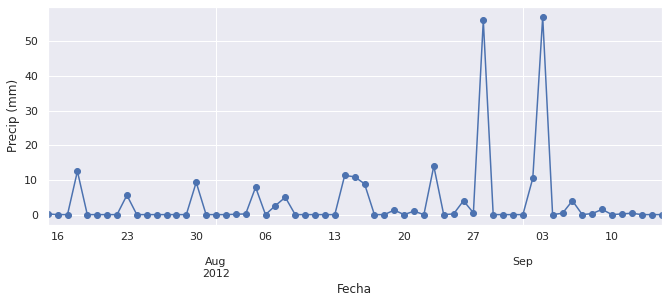

In [10]:
# Investigando un periodo de datos
ax = df_90.loc['2012-07-15':'2012-09-15', 'Precip'].plot(marker='o', linestyle='-')
ax.set_ylabel('Precip (mm)');

**Actividad 5.2:** Explora tus datos de Temperaturas Máxima y Mínima de los últimos 30 años datos a partir de 1990. Trata de construir dos subgráficas contiguas.
- Grafica todo el rango de datos utilizando la función df.plot(), incluye una línea punteada mostrando el promedio. 
- Analiza un año específico completo para las dos Temperaturas. 
- Grafica la estacionalidad filtrando tus datos por mes y utilizando la función sns.boxplot(), incluye una línea punteada mostrando el promedio. 

Variación ºC Tmax promedio 90-60 : 1.0423954206328574


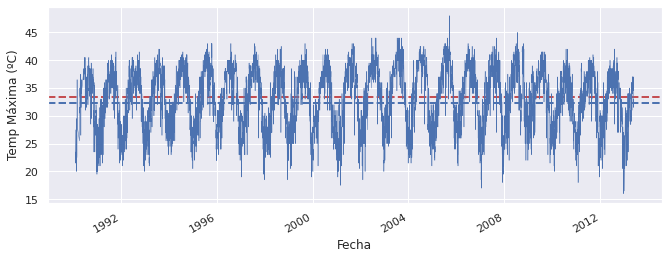

In [11]:
# Graficamos la Tmax de los últimos 30 años (1990-hasta 2013)
sns.set(rc={'figure.figsize':(11, 4)})
Tmax_ave_90 = df_90.Tmax.mean()
Tmax_ave_60 = df_60.Tmax.mean()
plt.axhline(Tmax_ave_90, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmax_ave_60, color = 'b', linestyle='--', linewidth=2);
df_90['Tmax'].plot(linewidth=0.5);
plt.ylabel('Temp Máxima (ºC)');
print('Variación ºC Tmax promedio 90-60 :', Tmax_ave_90-Tmax_ave_60)

Variación ºC Tmin promedio 90-60 : 0.5977093667027482


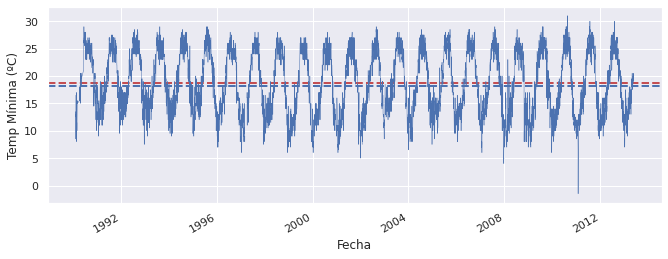

In [12]:
# Graficamos la Tmin de los últimos 30 años (1990-hasta 2013)
sns.set(rc={'figure.figsize':(11, 4)}) #Tamaño de la figura 
Tmin_ave_90 = df_90.Tmin.mean()
Tmin_ave_60 = df_60.Tmin.mean()
plt.axhline(Tmin_ave_90, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave_60, color = 'b', linestyle='--', linewidth=2);

df_90['Tmin'].plot(linewidth=0.5);
plt.ylabel('Temp Mínima (ºC)');
print('Variación ºC Tmin promedio 90-60 :', Tmin_ave_90-Tmin_ave_60)

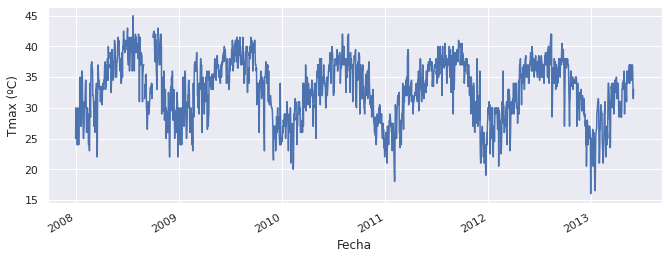

In [11]:
# Investigando un rango de datos
ax = df_90.loc['2008':'2013', 'Tmax'].plot()
ax.set_ylabel('Tmax (ºC)');

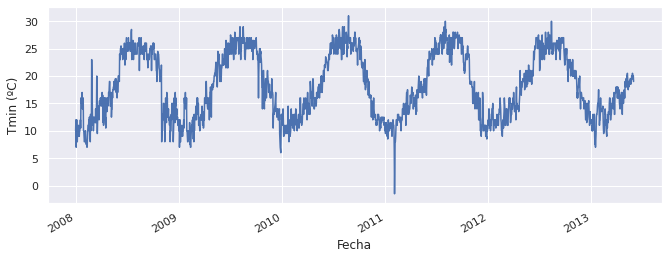

In [12]:
# Investigando un rango de datos
ax = df_90.loc['2008':'2013', 'Tmin'].plot()
ax.set_ylabel('Tmin (ºC)');

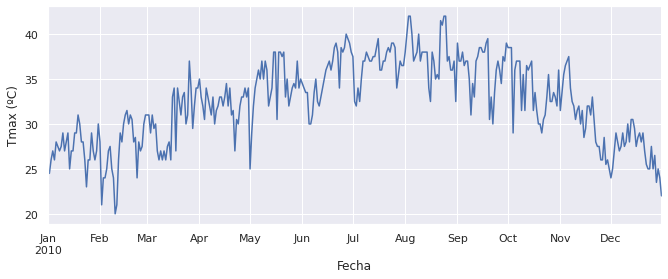

In [13]:
# Investigando un año de datos
ax = df_90.loc['2010', 'Tmax'].plot()
ax.set_ylabel('Tmax (ºC)');

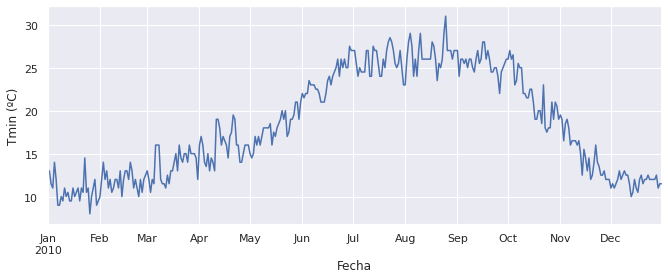

In [14]:
# Investigando un año de datos
ax = df_90.loc['2010', 'Tmin'].plot()
ax.set_ylabel('Tmin (ºC)');

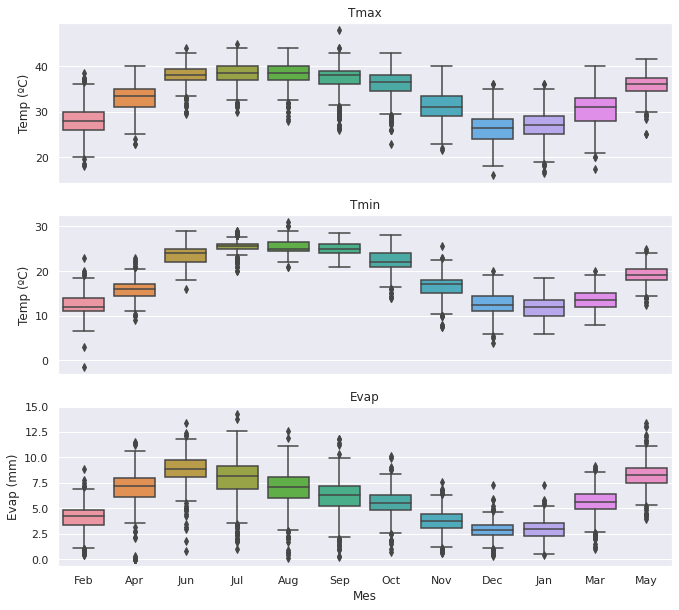

In [18]:
# Analizando Estacionalidad de los datos, similar a lo que ya hicimos anteriormente.
# Dos gráficas en una
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

for name, ax in zip(['Tmax', 'Tmin', 'Evap'], axes):
  sns.boxplot(data=df_90, x='Mes', y=name, ax=ax)
  if name != 'Evap':
    ax.set_ylabel('Temp (ºC)')
  else: 
    ax.set_ylabel('Evap (mm)')
  ax.set_title(name)
# Elimina la etiqueta del eje x excepto la de la subgráfica de abajo 
  if ax != axes[-1]:
    ax.set_xlabel('')



**Actividad 5.3:** Realiza el mismo análisis que en la Actividad 2, pero para la variable de Evaporación.

Variación Evaporación promedio 90-60 : -0.3075781181009507


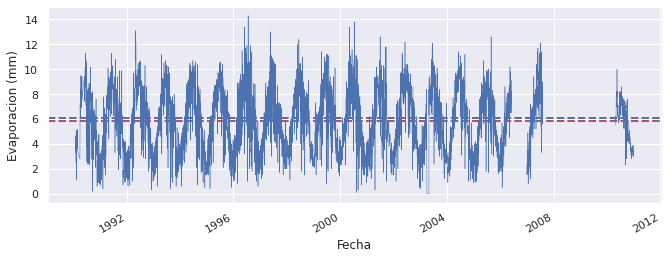

In [19]:
# Graficamos la Tmax de los últimos 30 años (1990-hasta 2013)
sns.set(rc={'figure.figsize':(11, 4)})
Evap_ave_90 = df_90.Evap.mean()
Evap_ave_60 = df_60.Evap.mean()
plt.axhline(Evap_ave_90, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Evap_ave_60, color = 'b', linestyle='--', linewidth=2);
df_90['Evap'].plot(linewidth=0.5);
plt.ylabel('Evaporacion (mm)');
print('Variación Evaporación promedio 90-60 :', Evap_ave_90-Evap_ave_60)

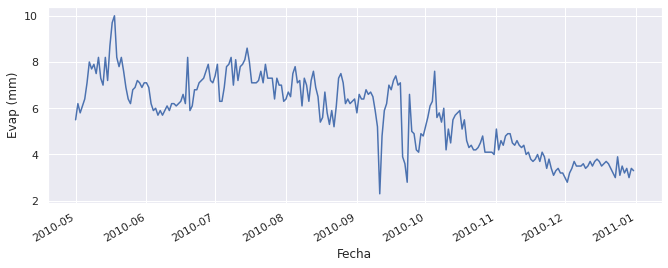

In [20]:
# Investigando un rango de datos
ax = df_90.loc['2008':'2013', 'Evap'].plot()
ax.set_ylabel('Evap (mm)');

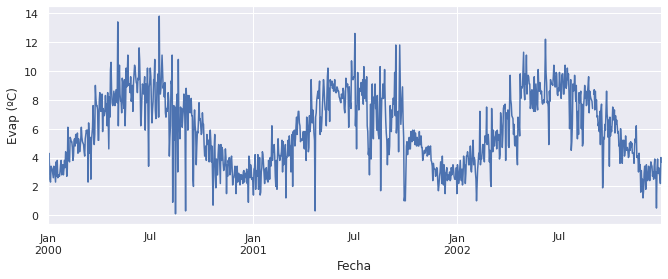

In [25]:
# Investigando un rango de datos
ax = df_90.loc['2000':'2002', 'Evap'].plot()
ax.set_ylabel('Evap (ºC)');

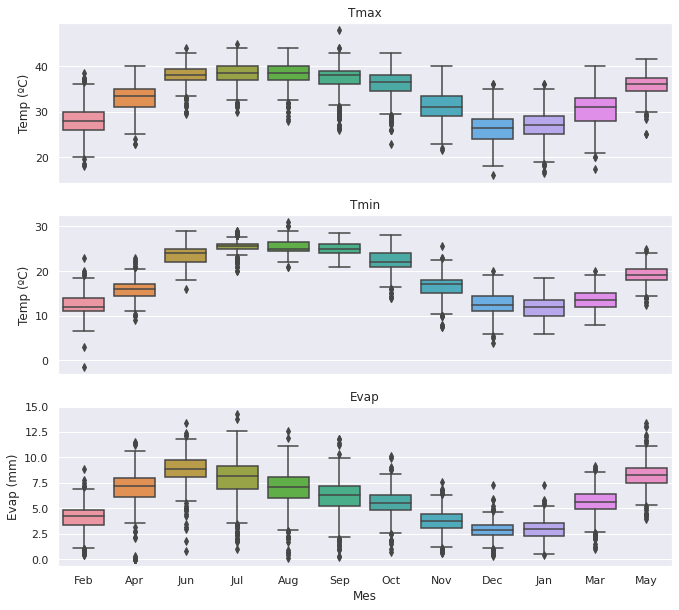

In [26]:
# Analizando Estacionalidad de los datos, similar a lo que ya hicimos anteriormente.
# Dos gráficas en una
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

for name, ax in zip(['Tmax', 'Tmin', 'Evap'], axes):
  sns.boxplot(data=df_90, x='Mes', y=name, ax=ax)
  if name != 'Evap':
    ax.set_ylabel('Temp (ºC)')
  else: 
    ax.set_ylabel('Evap (mm)')
  ax.set_title(name)
# Elimina la etiqueta del eje x excepto la de la subgráfica de abajo 
  if ax != axes[-1]:
    ax.set_xlabel('')

**Actividad 5.4:** Crea nuevos DataFrames de las Temperaturas y la Evaporación con promedios móviles de 7, 30 y 365 días, utilizando la función df.rolling(). Explora tus datos:
- Para un año de datos, contrastando los datos diarios con el promedio móvil de 7 y 30 días.
-Explora para 10 o más años de datos, contrastando los datos diarios con las gráficas de promedio móvil de 365 días.  

In [27]:
# Suavizando la curva de Tmax, utilizando Promedios Móviles (7,30 y 365 días)
data_cols = ['Evap', 'Tmax', 'Tmin']
df_90_7d = df_90[data_cols].rolling(7, center=True).mean()
df_90_30d = df_90[data_cols].rolling(30, center=True).mean()
df_90_365d = df_90[data_cols].rolling(365, center=True).mean()

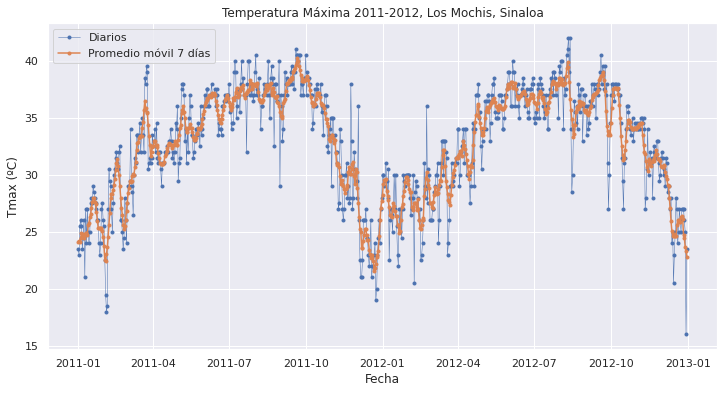

In [28]:
# Fechas de inicio y fin, para filtrar la información
start, end = '2011-01', '2012-12'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmax'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_90_7d.loc[start:end, 'Tmax'], marker='.', linestyle='-', label='Promedio móvil 7 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 2011-2012, Los Mochis, Sinaloa')
ax.legend();

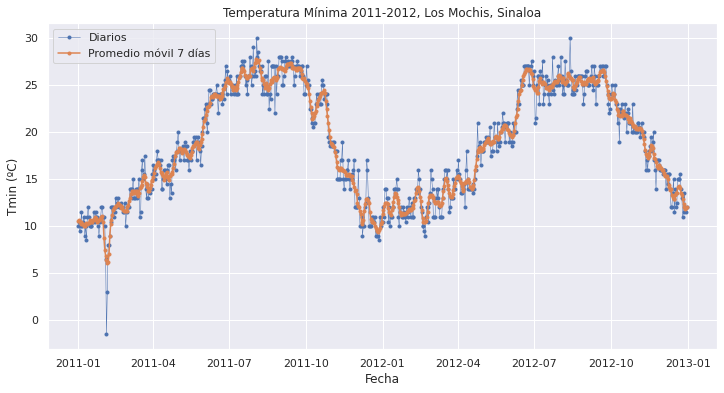

In [30]:
# Fechas de inicio y fin, para filtrar la información
start, end = '2011-01', '2012-12'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmin'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_90_7d.loc[start:end, 'Tmin'], marker='.', linestyle='-', label='Promedio móvil 7 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmin (ºC)')
ax.set_title('Temperatura Mínima 2011-2012, Los Mochis, Sinaloa')
ax.legend();

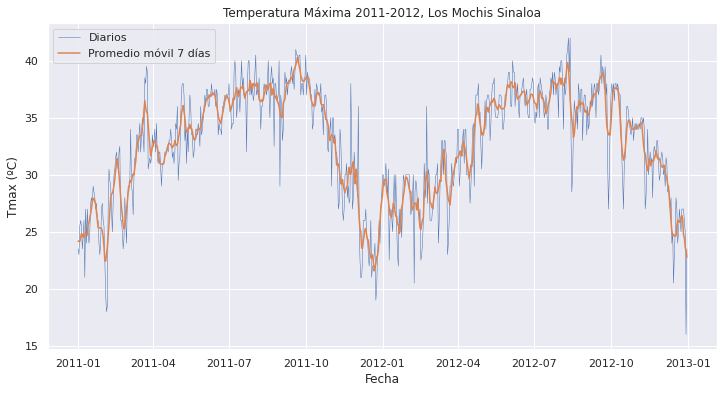

In [31]:
# Misma gráfica anterior pero sin marcadores '.'
# Fechas de inicio y fin, para filtrar la información
start, end = '2011-01', '2012-12'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmax'],
linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_90_7d.loc[start:end, 'Tmax'], linestyle='-', label='Promedio móvil 7 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 2011-2012, Los Mochis Sinaloa')
ax.legend();

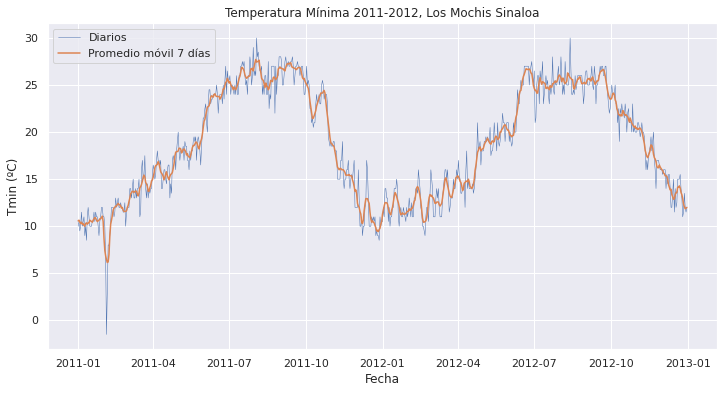

In [32]:
# Misma gráfica anterior pero sin marcadores '.'
# Fechas de inicio y fin, para filtrar la información
start, end = '2011-01', '2012-12'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmin'],
linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_90_7d.loc[start:end, 'Tmin'], linestyle='-', label='Promedio móvil 7 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmin (ºC)')
ax.set_title('Temperatura Mínima 2011-2012, Los Mochis Sinaloa')
ax.legend();

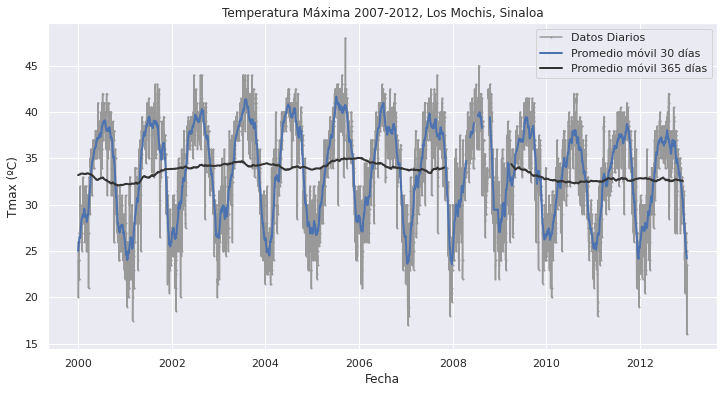

In [33]:
# Tendencias ... año con año

# Fechas de inicio y fin, para filtrar la información
start, end = '2000-01', '2012-12'

# Contraste de la gráfica de datos diarios y promedio móvil de 30 y 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmax'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
#ax.plot(df_90_7d.loc[start:end, 'Tmax'], linestyle='-', label='Promedio móvil 7 días')
ax.plot(df_90_30d.loc[start:end, 'Tmax'], linestyle='-', linewidth=2, label='Promedio móvil 30 días')
ax.plot(df_90_365d.loc[start:end, 'Tmax'], linestyle='-', color='0.2', linewidth=2, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 2007-2012, Los Mochis, Sinaloa')
ax.legend();

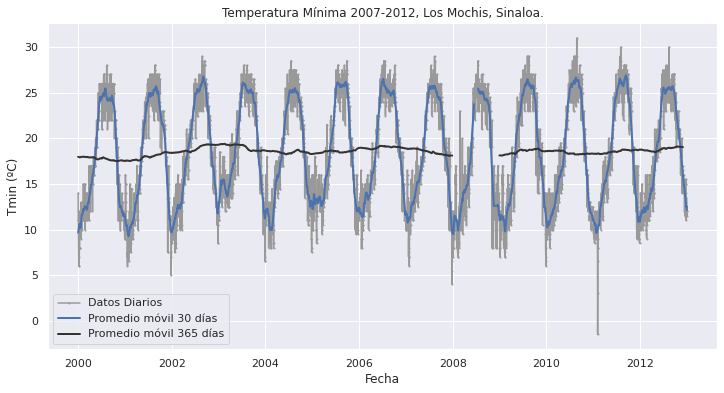

In [34]:
# Tendencias ... año con año para Tmin

# Fechas de inicio y fin, para filtrar la información
start, end = '2000-01', '2012-12'

# Contraste de la gráfica de datos diarios y promedio móvil de 30 y 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmin'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
#ax.plot(df_90_7d.loc[start:end, 'Tmin'], linestyle='-', label='Promedio móvil 7 días')
ax.plot(df_90_30d.loc[start:end, 'Tmin'], linestyle='-', linewidth=2, label='Promedio móvil 30 días')
ax.plot(df_90_365d.loc[start:end, 'Tmin'], linestyle='-', color='0.2', linewidth=2, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmin (ºC)')
ax.set_title('Temperatura Mínima 2007-2012, Los Mochis, Sinaloa.')
ax.legend();

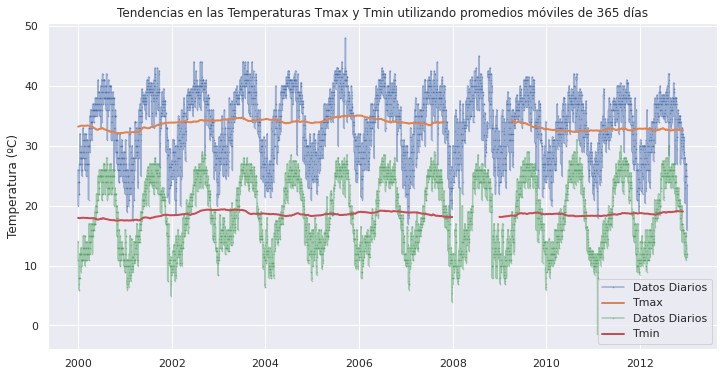

In [35]:

# Graficas de promedios móviles de 365 días para las variables de las Temperaturas  
start, end = '2000-01', '2012-12'

fig, ax = plt.subplots()
for nm in ['Tmax', 'Tmin']:
    ax.plot(df_90.loc[start:end, nm], marker='.', markersize=1, linestyle='-', alpha=0.5, label='Datos Diarios')
    ax.plot(df_90_365d.loc[start:end, nm], linewidth=2, label=nm)
    
    ax.legend()
    ax.set_ylabel('Temperatura (ºC)')
    ax.set_title('Tendencias en las Temperaturas Tmax y Tmin utilizando promedios móviles de 365 días');

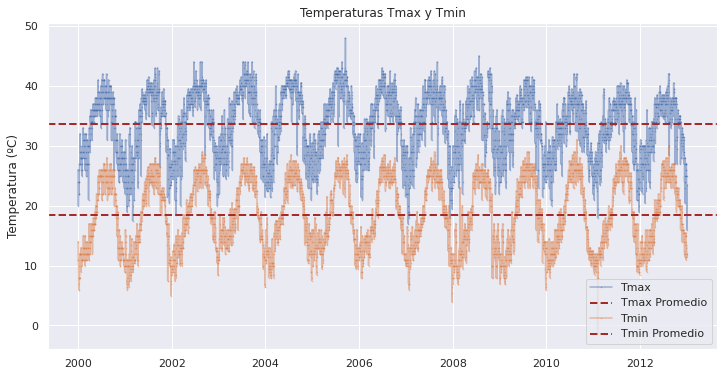

In [36]:
#Graficas de Temperaturas Tmax, Tmin y Promedios  
sns.set(rc={'figure.figsize':(12, 6)})

start, end = '2000-01', '2012-12'

fig, ax = plt.subplots()
for nm in ['Tmax', 'Tmin']:
    ax.plot(df_90.loc[start:end, nm], marker='.', markersize=1, linestyle='-', 
            alpha=0.5, label=nm)
    plt.axhline(df_90.loc[start:end, nm].mean(), color='brown', linestyle='--', 
                linewidth=2, label=nm + ' Promedio');
    
    ax.legend()
    ax.set_ylabel('Temperatura (ºC)')
    ax.set_title('Temperaturas Tmax y Tmin');

In [37]:
df_90_365d.info()
print(df_90_365d.head(185))
print(df_90_365d.tail(185))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8456 entries, 1990-02-01 to 2013-05-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Evap    4582 non-null   float64
 1   Tmax    7573 non-null   float64
 2   Tmin    7332 non-null   float64
dtypes: float64(3)
memory usage: 584.2 KB
                Evap       Tmax       Tmin
Fecha                                     
1990-02-01       NaN        NaN        NaN
1990-02-02       NaN        NaN        NaN
1990-02-03       NaN        NaN        NaN
1990-02-04       NaN        NaN        NaN
1990-02-05       NaN        NaN        NaN
...              ...        ...        ...
1990-10-01       NaN        NaN        NaN
1990-10-02       NaN        NaN        NaN
1990-10-03  5.322466  31.760274  19.043836
1990-10-04  5.333699  31.783562  19.047945
1990-10-05  5.341370  31.817808  19.058904

[185 rows x 3 columns]
            Evap       Tmax       Tmin
Fecha                      

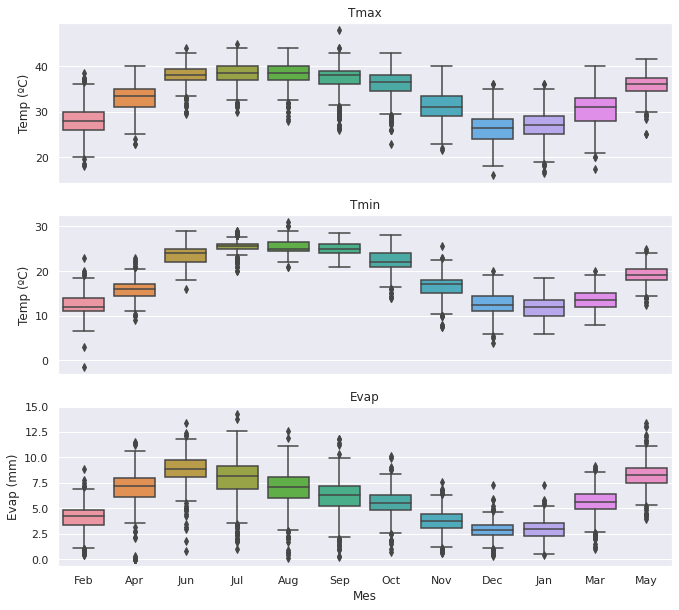

In [38]:
# Analizando Estacionalidad de los datos, similar a lo que ya hicimos anteriormente.
# Dos gráficas en una
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

for name, ax in zip(['Tmax', 'Tmin', 'Evap'], axes):
  sns.boxplot(data=df_90, x='Mes', y=name, ax=ax)
  if name != 'Evap':
    ax.set_ylabel('Temp (ºC)')
  else: 
    ax.set_ylabel('Evap (mm)')
  ax.set_title(name)
# Elimina la etiqueta del eje x excepto la de la subgráfica de abajo 
  if ax != axes[-1]:
    ax.set_xlabel('')

**Actividad 5.5:** Utiliza la biblioteca statsmodels.tsa de Python, para realizar una descomposición de una serie de tiempo: Serie Observada = Tendencia + Estacionalidad + Residuo.

Aplica la función seasonal_decompose para lograr esto, a los datos de Temperaturas Tmax y Tmin, y si tienes datos de Evaporación, selecciona un periodo que haya datos. La función de seasonal_decompose aplica su propio promedio móvil a las series de datos para su análisis.  


Análisis de Tendencia de Tmax usando statsmodel

Temp observada = Tendencia + Estacionalidad + Residuo

(res.resid, res.seasonal, res.trend)

Ver: Biblioteca TSA - Time Series Analysis de Statsmodels statsmodels.tsa

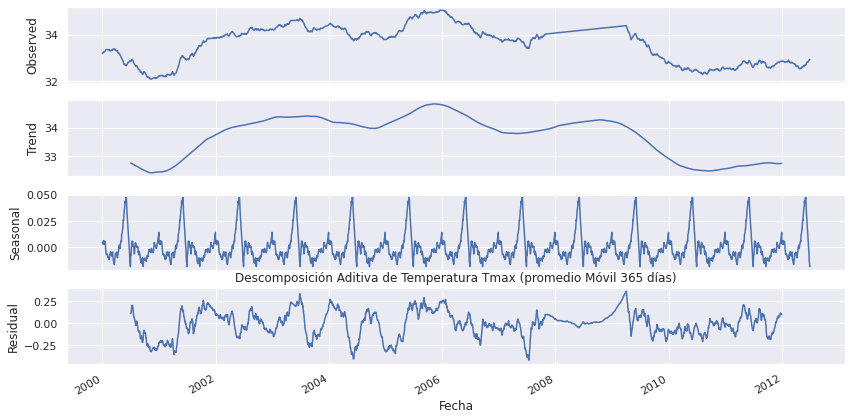

In [39]:
# Caso: Uso de datos con promedio móvil de 365 días.
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2000-01', '2012-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_90_365d.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (promedio Móvil 365 días)');


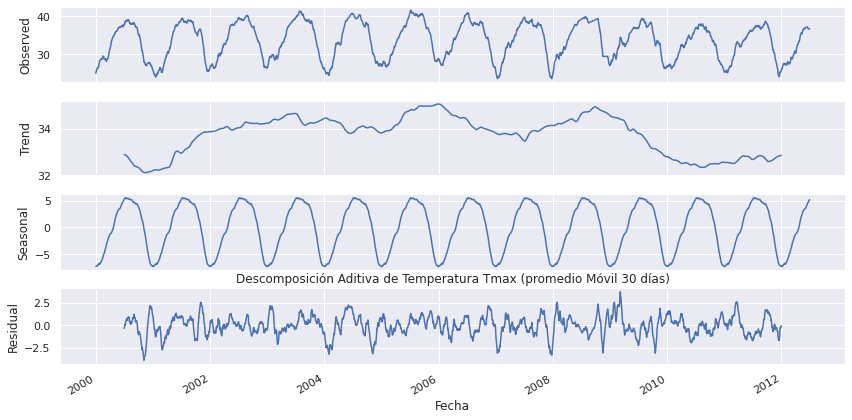

In [46]:
# Caso: Uso de datos con promedio móvil de 30 días.
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2000-01', '2012-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_90_30d.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (promedio Móvil 30 días)');

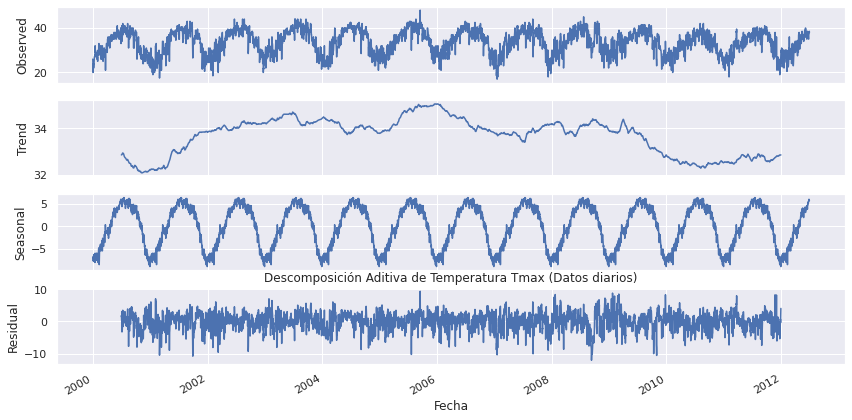

In [47]:
# Caso: Uso de datos diarios 
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2000-01', '2012-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_90.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (Datos diarios)');

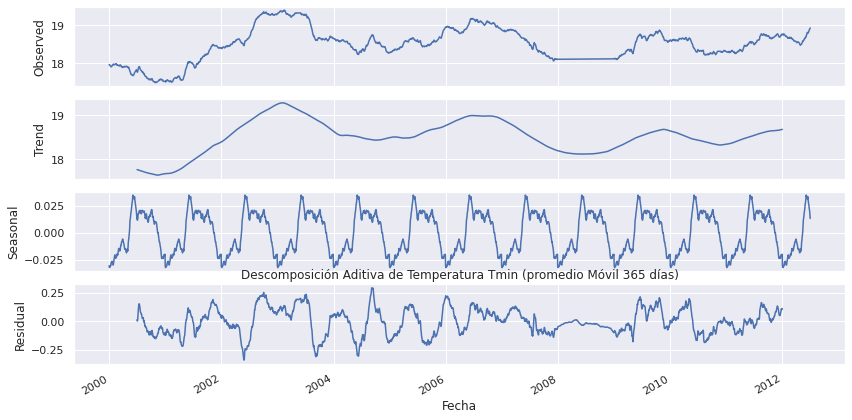

In [48]:
#Anlálisis de tendencias de tmin

# Caso: Uso de datos con promedio móvil de 365 días.
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2000-01', '2012-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

resTmin = sm.tsa.seasonal_decompose(df_90_365d.loc[start:end, 'Tmin'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Tmin (promedio Móvil 365 días)');

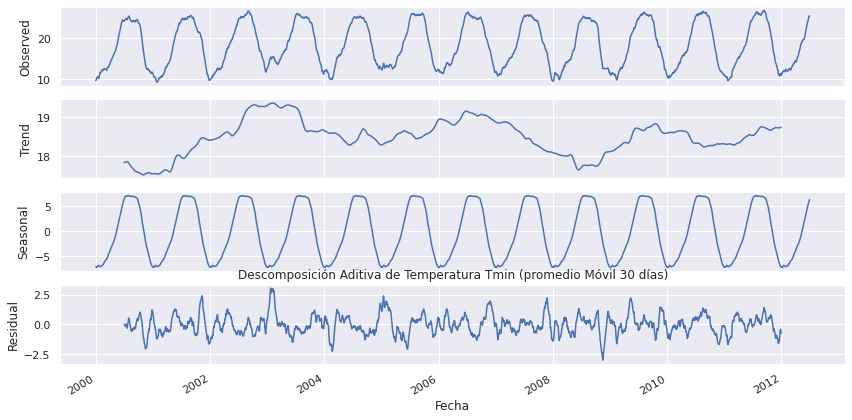

In [49]:
# Caso: Uso de datos con promedio móvil de 30 días.
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2000-01', '2012-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

resTmin = sm.tsa.seasonal_decompose(df_90_30d.loc[start:end, 'Tmin'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Tmin (promedio Móvil 30 días)');

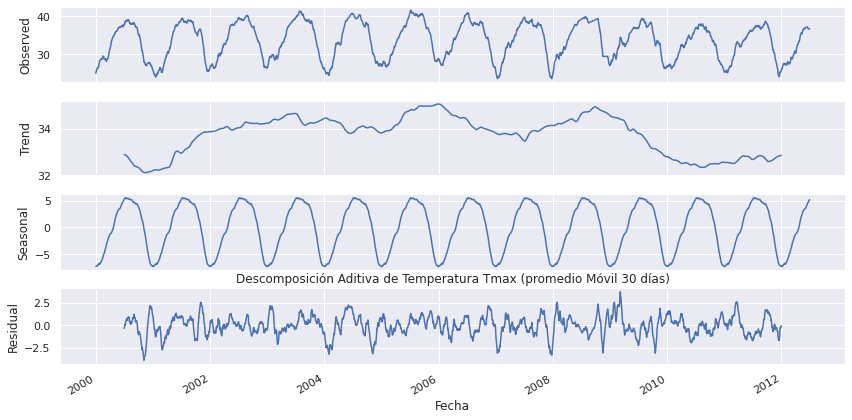

In [50]:
# Caso: Uso de datos con promedio móvil de 30 días.
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2000-01', '2012-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

resTmin = sm.tsa.seasonal_decompose(df_90_30d.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (promedio Móvil 30 días)');

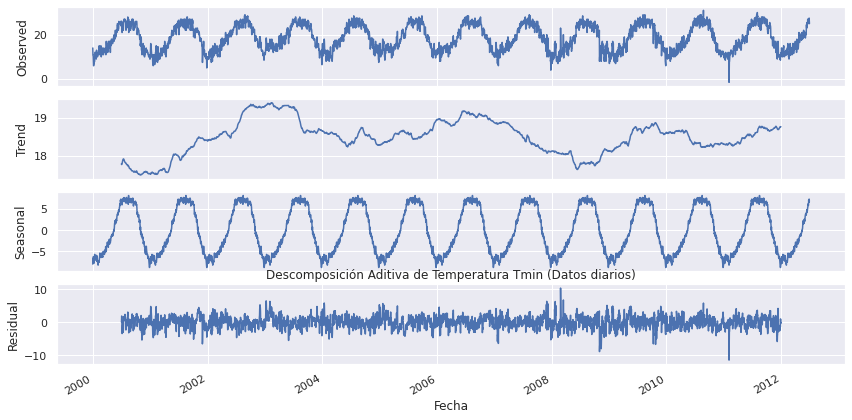

In [51]:
# Caso: Uso de datos diarios.
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2000-01', '2012-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

resTmin = sm.tsa.seasonal_decompose(df_90.loc[start:end, 'Tmin'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Tmin (Datos diarios)');

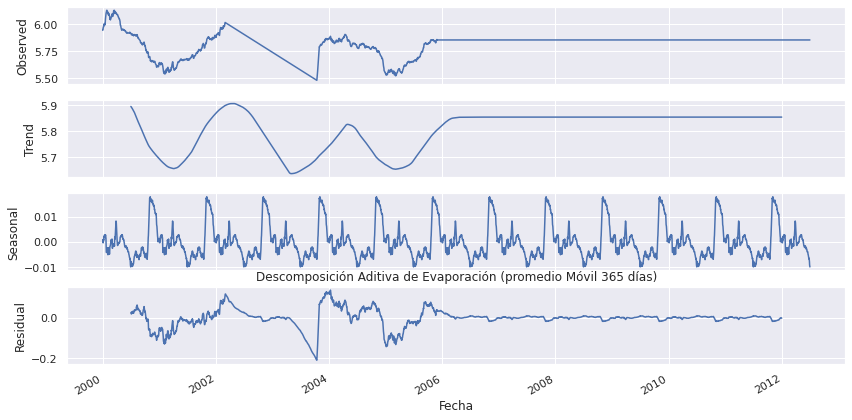

In [40]:
# Caso: Uso de datos con promedio móvil de 365 días.
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2000-01', '2012-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_90_365d.loc[start:end, 'Evap'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Evaporación (promedio Móvil 365 días)');

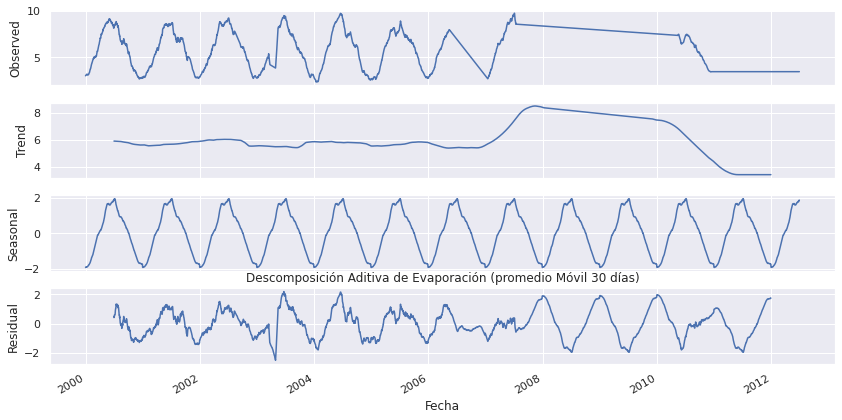

In [41]:
# Caso: Uso de datos con promedio móvil de 30 días.
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2000-01', '2012-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_90_30d.loc[start:end, 'Evap'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Evaporación (promedio Móvil 30 días)');

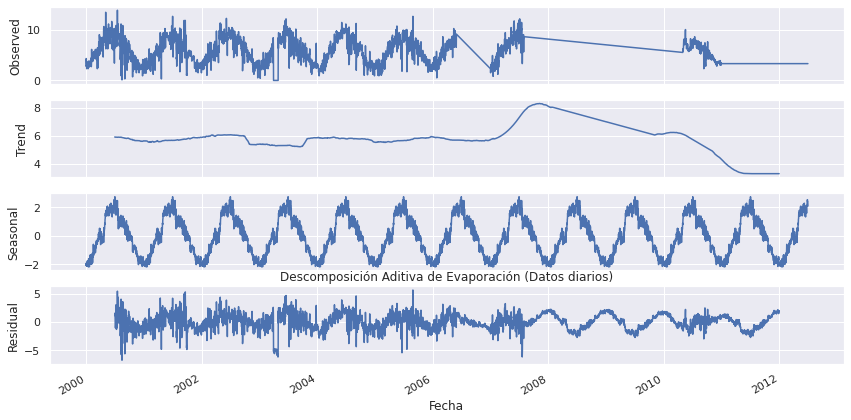

In [42]:
# Caso: Uso de datos diarios 
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2000-01', '2012-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_90.loc[start:end, 'Evap'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Evaporación (Datos diarios)');

In [45]:
resTmax.trend.describe()

count    4198.000000
mean        5.855927
std         1.054345
min         3.299452
25%         5.581096
50%         5.810822
75%         6.131144
max         8.302596
Name: Evap, dtype: float64

**Actividas 5.6:**Por favor explora visualmente si se observa un cambio en la distribución de Temperaturas (histogramas y kde), sobreponiendo dos histogramas de dos periodos de 30 años contiguos. Utiliza la función de Seaborn: sns.distplot. Agrega una línea vertical punteada indicando el valor del promedio de cada grupo de datos.  

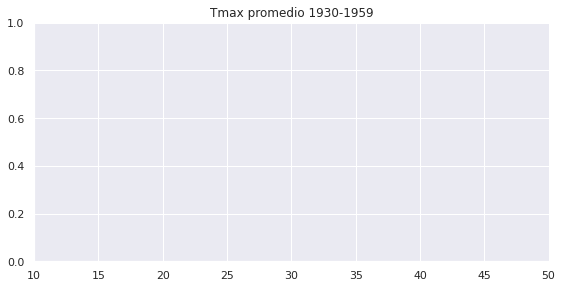

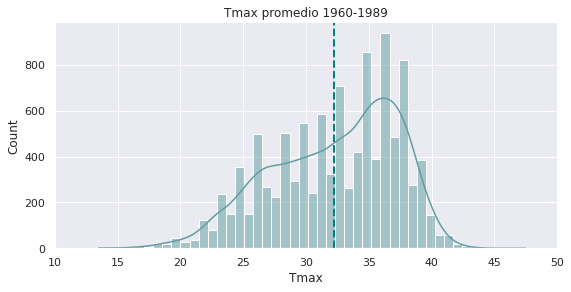

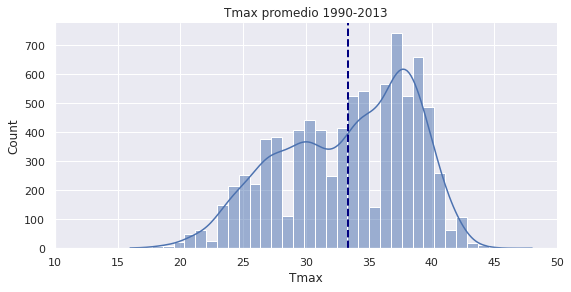

Tmax_promedio df_30 =  nan ºC
Tmax_promedio df_60 =  32.26152173913044 ºC
Tmax_promedio df_90 =  33.303917159763294 ºC


In [46]:
# Gráfica de distribuciones de Temperaturas Tmax 

g1 = sns.displot(df_30.Tmax, kde=True, color='lightblue', height=4, aspect=2);
plt.axvline(df_30.Tmax.mean(), linestyle='--', linewidth=2, color='steelblue');

g2 = sns.displot(df_60.Tmax, kde=True, color='cadetblue', height=4, aspect=2);
plt.axvline(df_60.Tmax.mean(), linestyle='--', linewidth=2, color='teal');

g3 = sns.displot(df_90.Tmax, kde=True, height=4, aspect=2);
plt.axvline(df_90.Tmax.mean(), linestyle='--', linewidth=2, color='navy');

g1.set(title='Tmax promedio 1930-1959');
g2.set(title='Tmax promedio 1960-1989');
g3.set(title='Tmax promedio 1990-2013');
g1.set(xlim=(10,50))
g2.set(xlim=(10,50))
g3.set(xlim=(10,50))


plt.show();

print('Tmax_promedio df_30 = ', df_30.Tmax.mean(), 'ºC' )
print('Tmax_promedio df_60 = ', df_60.Tmax.mean(), 'ºC' )
print('Tmax_promedio df_90 = ', df_90.Tmax.mean(), 'ºC' )


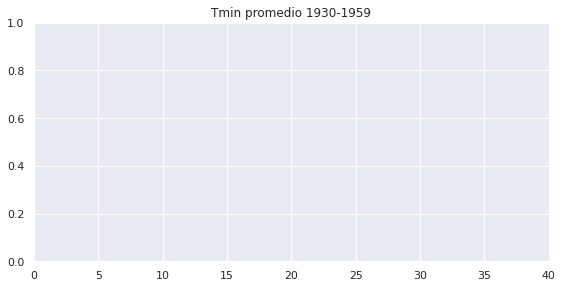

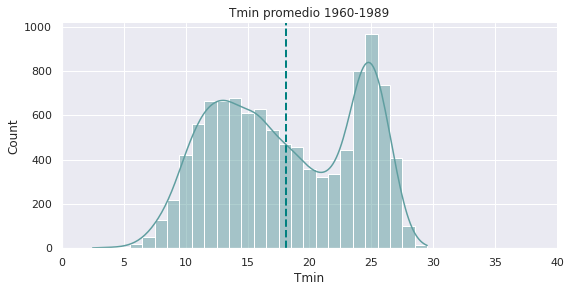

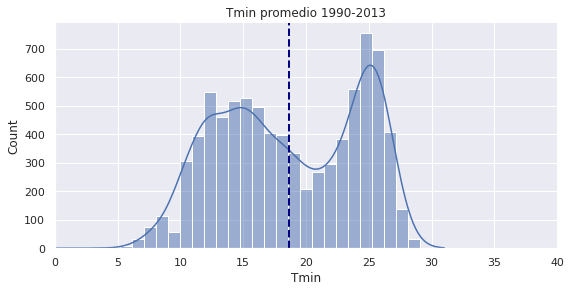

Tmin_promedio df_30 =  nan ºC
Tmin_promedio df_60 =  18.084092627599247 ºC
Tmin_promedio df_90 =  18.681801994301996 ºC
Tmin_sdev df_30 =  nan ºC
Tmin_sdev df_60 =  5.689793921737771 ºC
Tmin_sdev df_90 =  5.644145970865683 ºC


In [47]:
# Gráfica de distribuciones de Temperaturas Tmin 

g1 = sns.displot(df_30.Tmin, kde=True, color='lightblue', height=4, aspect=2);
plt.axvline(df_30.Tmin.mean(), linestyle='--', linewidth=2, color='steelblue');

g2 = sns.displot(df_60.Tmin, kde=True, color='cadetblue', height=4, aspect=2);
plt.axvline(df_60.Tmin.mean(), linestyle='--', linewidth=2, color='teal');

g3 = sns.displot(df_90.Tmin, kde=True, height=4, aspect=2);
plt.axvline(df_90.Tmin.mean(), linestyle='--', linewidth=2, color='navy');

g1.set(title='Tmin promedio 1930-1959');
g2.set(title='Tmin promedio 1960-1989');
g3.set(title='Tmin promedio 1990-2013');
g1.set(xlim=(0,40))
g2.set(xlim=(0,40))
g3.set(xlim=(0,40))


plt.show();

print('Tmin_promedio df_30 = ', df_30.Tmin.mean(), 'ºC' )
print('Tmin_promedio df_60 = ', df_60.Tmin.mean(), 'ºC' )
print('Tmin_promedio df_90 = ', df_90.Tmin.mean(), 'ºC' )

print('Tmin_sdev df_30 = ', df_30.Tmin.std(), 'ºC' )
print('Tmin_sdev df_60 = ', df_60.Tmin.std(), 'ºC' )
print('Tmin_sdev df_90 = ', df_90.Tmin.std(), 'ºC' )